<a href="https://www.kaggle.com/lalina/drug-classifier-decision-tree?scriptVersionId=88373351" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

# Drug Classification Model using Decision Tree Algorithm

The dataset contains 200 rows of patient data of whom suffered from an illness. During the treatment, the doctor collected each patients data such as age, sex, blood pressure, cholesterol, and sodium to potassium value.Based on those data, the doctor prescribed 5 medication : Drug A, Drug B, Drug C, Drug X and Drug Y.

In this project I will build a model using decision tree to predict the medication that may be appropriate for future patients according to their condition based on this dataset. 

## Import the library and load the data

In [1]:
import pandas as pd
import numpy as np
from sklearn.tree import DecisionTreeClassifier

In [2]:
path = "../input/drug-classification/drug200.csv"
df = pd.read_csv(path)

# Check shape, info, missing values and unique values

In [3]:
df.head()

,Age,Sex,BP,Cholesterol,Na_to_K,Drug
0,23,F,HIGH,HIGH,25.355,DrugY
1,47,M,LOW,HIGH,13.093,drugC
2,47,M,LOW,HIGH,10.114,drugC
3,28,F,NORMAL,HIGH,7.798,drugX
4,61,F,LOW,HIGH,18.043,DrugY


In [4]:
df.columns[0:5]

Index(['Age', 'Sex', 'BP', 'Cholesterol', 'Na_to_K'], dtype='object')

In [5]:
df.Sex.unique()

array(['F', 'M'], dtype=object)

In [6]:
df.BP.unique()

array(['HIGH', 'LOW', 'NORMAL'], dtype=object)

In [7]:
df.Cholesterol.unique()

array(['HIGH', 'NORMAL'], dtype=object)

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 6 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Age          200 non-null    int64  
 1   Sex          200 non-null    object 
 2   BP           200 non-null    object 
 3   Cholesterol  200 non-null    object 
 4   Na_to_K      200 non-null    float64
 5   Drug         200 non-null    object 
dtypes: float64(1), int64(1), object(4)
memory usage: 9.5+ KB


In [9]:
# Check for missing values
df.isnull().sum()

Age            0
Sex            0
BP             0
Cholesterol    0
Na_to_K        0
Drug           0
dtype: int64

In [10]:
# Check shape of data
df.shape

(200, 6)

## Preprocessing 
### Declare the features and matrix
* features = Age, Sex, BP, Cholesterol, Na_to_K
* target = drug

In [11]:
y = df["Drug"]
y[0:5]

0    DrugY
1    drugC
2    drugC
3    drugX
4    DrugY
Name: Drug, dtype: object

In [12]:
x = df[["Age","Sex","BP","Cholesterol", "Na_to_K"]].values
x[0:10]

array([[23, 'F', 'HIGH', 'HIGH', 25.355],
       [47, 'M', 'LOW', 'HIGH', 13.093],
       [47, 'M', 'LOW', 'HIGH', 10.114],
       [28, 'F', 'NORMAL', 'HIGH', 7.798],
       [61, 'F', 'LOW', 'HIGH', 18.043],
       [22, 'F', 'NORMAL', 'HIGH', 8.607],
       [49, 'F', 'NORMAL', 'HIGH', 16.275],
       [41, 'M', 'LOW', 'HIGH', 11.037],
       [60, 'M', 'NORMAL', 'HIGH', 15.171],
       [43, 'M', 'LOW', 'NORMAL', 19.368]], dtype=object)

### Dummies for categorical data

Before create the classifier, we need to preprocess the data first because some of them are categorical data (Age, Sex, BP) and the Decission Tree Classifier can not process them. Let's process the features into dummies.

In [13]:
from sklearn import preprocessing

sex = preprocessing.LabelEncoder()
sex.fit(['F','M'])
x[:,1] = sex.transform(x[:,1]) #transform x on the column no.1 


BP = preprocessing.LabelEncoder()
BP.fit([ 'LOW', 'NORMAL', 'HIGH'])
x[:,2] = BP.transform(x[:,2]) #transform x on the column no.2 


chol = preprocessing.LabelEncoder()
chol.fit([ 'NORMAL', 'HIGH'])
x[:,3] = chol.transform(x[:,3]) #transform x on the column no.3

## Set the decision tree
### Train test split the data

In [14]:
from sklearn.model_selection import train_test_split

* Name the parameters : x_train, y_train, x_test, y_test
* size = 0.3
* random_state = 3

In [15]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.3, random_state = 3)

In [16]:
# Check the shape, make sure the dimensions match for train and test sets
x_train.shape

(140, 5)

In [17]:
y_train.shape

(140,)

In [18]:
x_test.shape

(60, 5)

In [19]:
y_test.shape

(60,)

## Modelling

Create model using **DecisionTreeClassifier** and call it as **drugtree**.

In [20]:
drugtree = DecisionTreeClassifier(criterion = "entropy", max_depth = 5)
drugtree # this shows the default parameter

DecisionTreeClassifier(criterion='entropy', max_depth=5)

[Explanation of entropy](https://quantdare.com/decision-trees-gini-vs-entropy/) :
Entropy is a measure of information that indicates the disorder of the features with the target. Similar to the Gini Index, the optimum split is chosen by the feature with less entropy. It gets its maximum value when the probability of the two classes is the same and a node is pure when the entropy has its minimum value, which is 0


In [21]:
# Fit the data of features in x_train and target y_train

drugtree.fit(x_train, y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=5)

## Prediction
After fitting the train set is done, next we try to predict the test set.

In [22]:
predtree = drugtree.predict(x_test)

In [23]:
# the result
predtree

array(['DrugY', 'drugX', 'drugX', 'drugX', 'drugX', 'drugC', 'DrugY',
       'drugA', 'drugB', 'drugA', 'DrugY', 'drugA', 'DrugY', 'DrugY',
       'drugX', 'DrugY', 'drugX', 'drugX', 'drugB', 'drugX', 'drugX',
       'DrugY', 'DrugY', 'DrugY', 'drugX', 'drugB', 'DrugY', 'DrugY',
       'drugA', 'drugX', 'drugB', 'drugC', 'drugC', 'drugX', 'drugX',
       'drugC', 'DrugY', 'drugX', 'drugX', 'drugX', 'drugA', 'DrugY',
       'drugC', 'DrugY', 'drugA', 'DrugY', 'DrugY', 'DrugY', 'DrugY',
       'DrugY', 'drugB', 'drugX', 'DrugY', 'drugX', 'DrugY', 'DrugY',
       'drugA', 'drugX', 'DrugY', 'drugX'], dtype=object)

In [24]:
# let's compare the result of predtree with y_test set
print(predtree[0:5])
print(y_test[0:5])

['DrugY' 'drugX' 'drugX' 'drugX' 'drugX']
40     DrugY
51     drugX
139    drugX
197    drugX
170    drugX
Name: Drug, dtype: object


## Evaluation of the decision tree
Evaluation is important to find the accuracy of our decision tree. It is shown in a form of percentage where the prediction results compared to the target in the test set.

In [25]:
from sklearn import metrics
import matplotlib.pyplot as plt
print("DecisionTree's Accuracy", metrics.accuracy_score(y_test, predtree))

DecisionTree's Accuracy 0.9833333333333333


The result of accuracy is 98,34% which means our model correctly predict around 98% of target.

## Visualization

Visualize the tree to see the decision tree we made. 

In [26]:
# Install pydotplus and python graphviz first
!conda install -c conda-forge pydotplus -y
!conda install -c conda-forge python-graphviz -y

Solving environment: / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - done

## Package Plan ##

  environment location: /opt/conda

  added / updated specs:
    - pydotplus


The following packages will be downloaded:

    package                    |            build
    ---------------------------|-----------------
    pydotplus-2.0.2            |     pyhaef67bd_5          24 KB  conda-forge
    ------------------------------------------------------------
                                           Total:          24 KB

The following NEW packages will be INSTALLED:

  pydotplus          conda-forge/noarch::pydotplus-2.0.2-pyhaef67bd_5



pydotplus-2.0.2      | 24 KB     | ##################################### 

In [27]:
# Prepare the tools
from io import StringIO
import pydotplus
import matplotlib.image as mpimg
from sklearn import tree
%matplotlib inline

In [28]:
dot_data =StringIO()
filename = "drugtree.png"
featurenames = df.columns[0:5]
output = tree.export_graphviz(drugtree, feature_names = featurenames,
                             out_file = dot_data,
                             class_names = np.unique(y_train),
                             filled = True,
                             special_characters = True,
                             rotate = False)


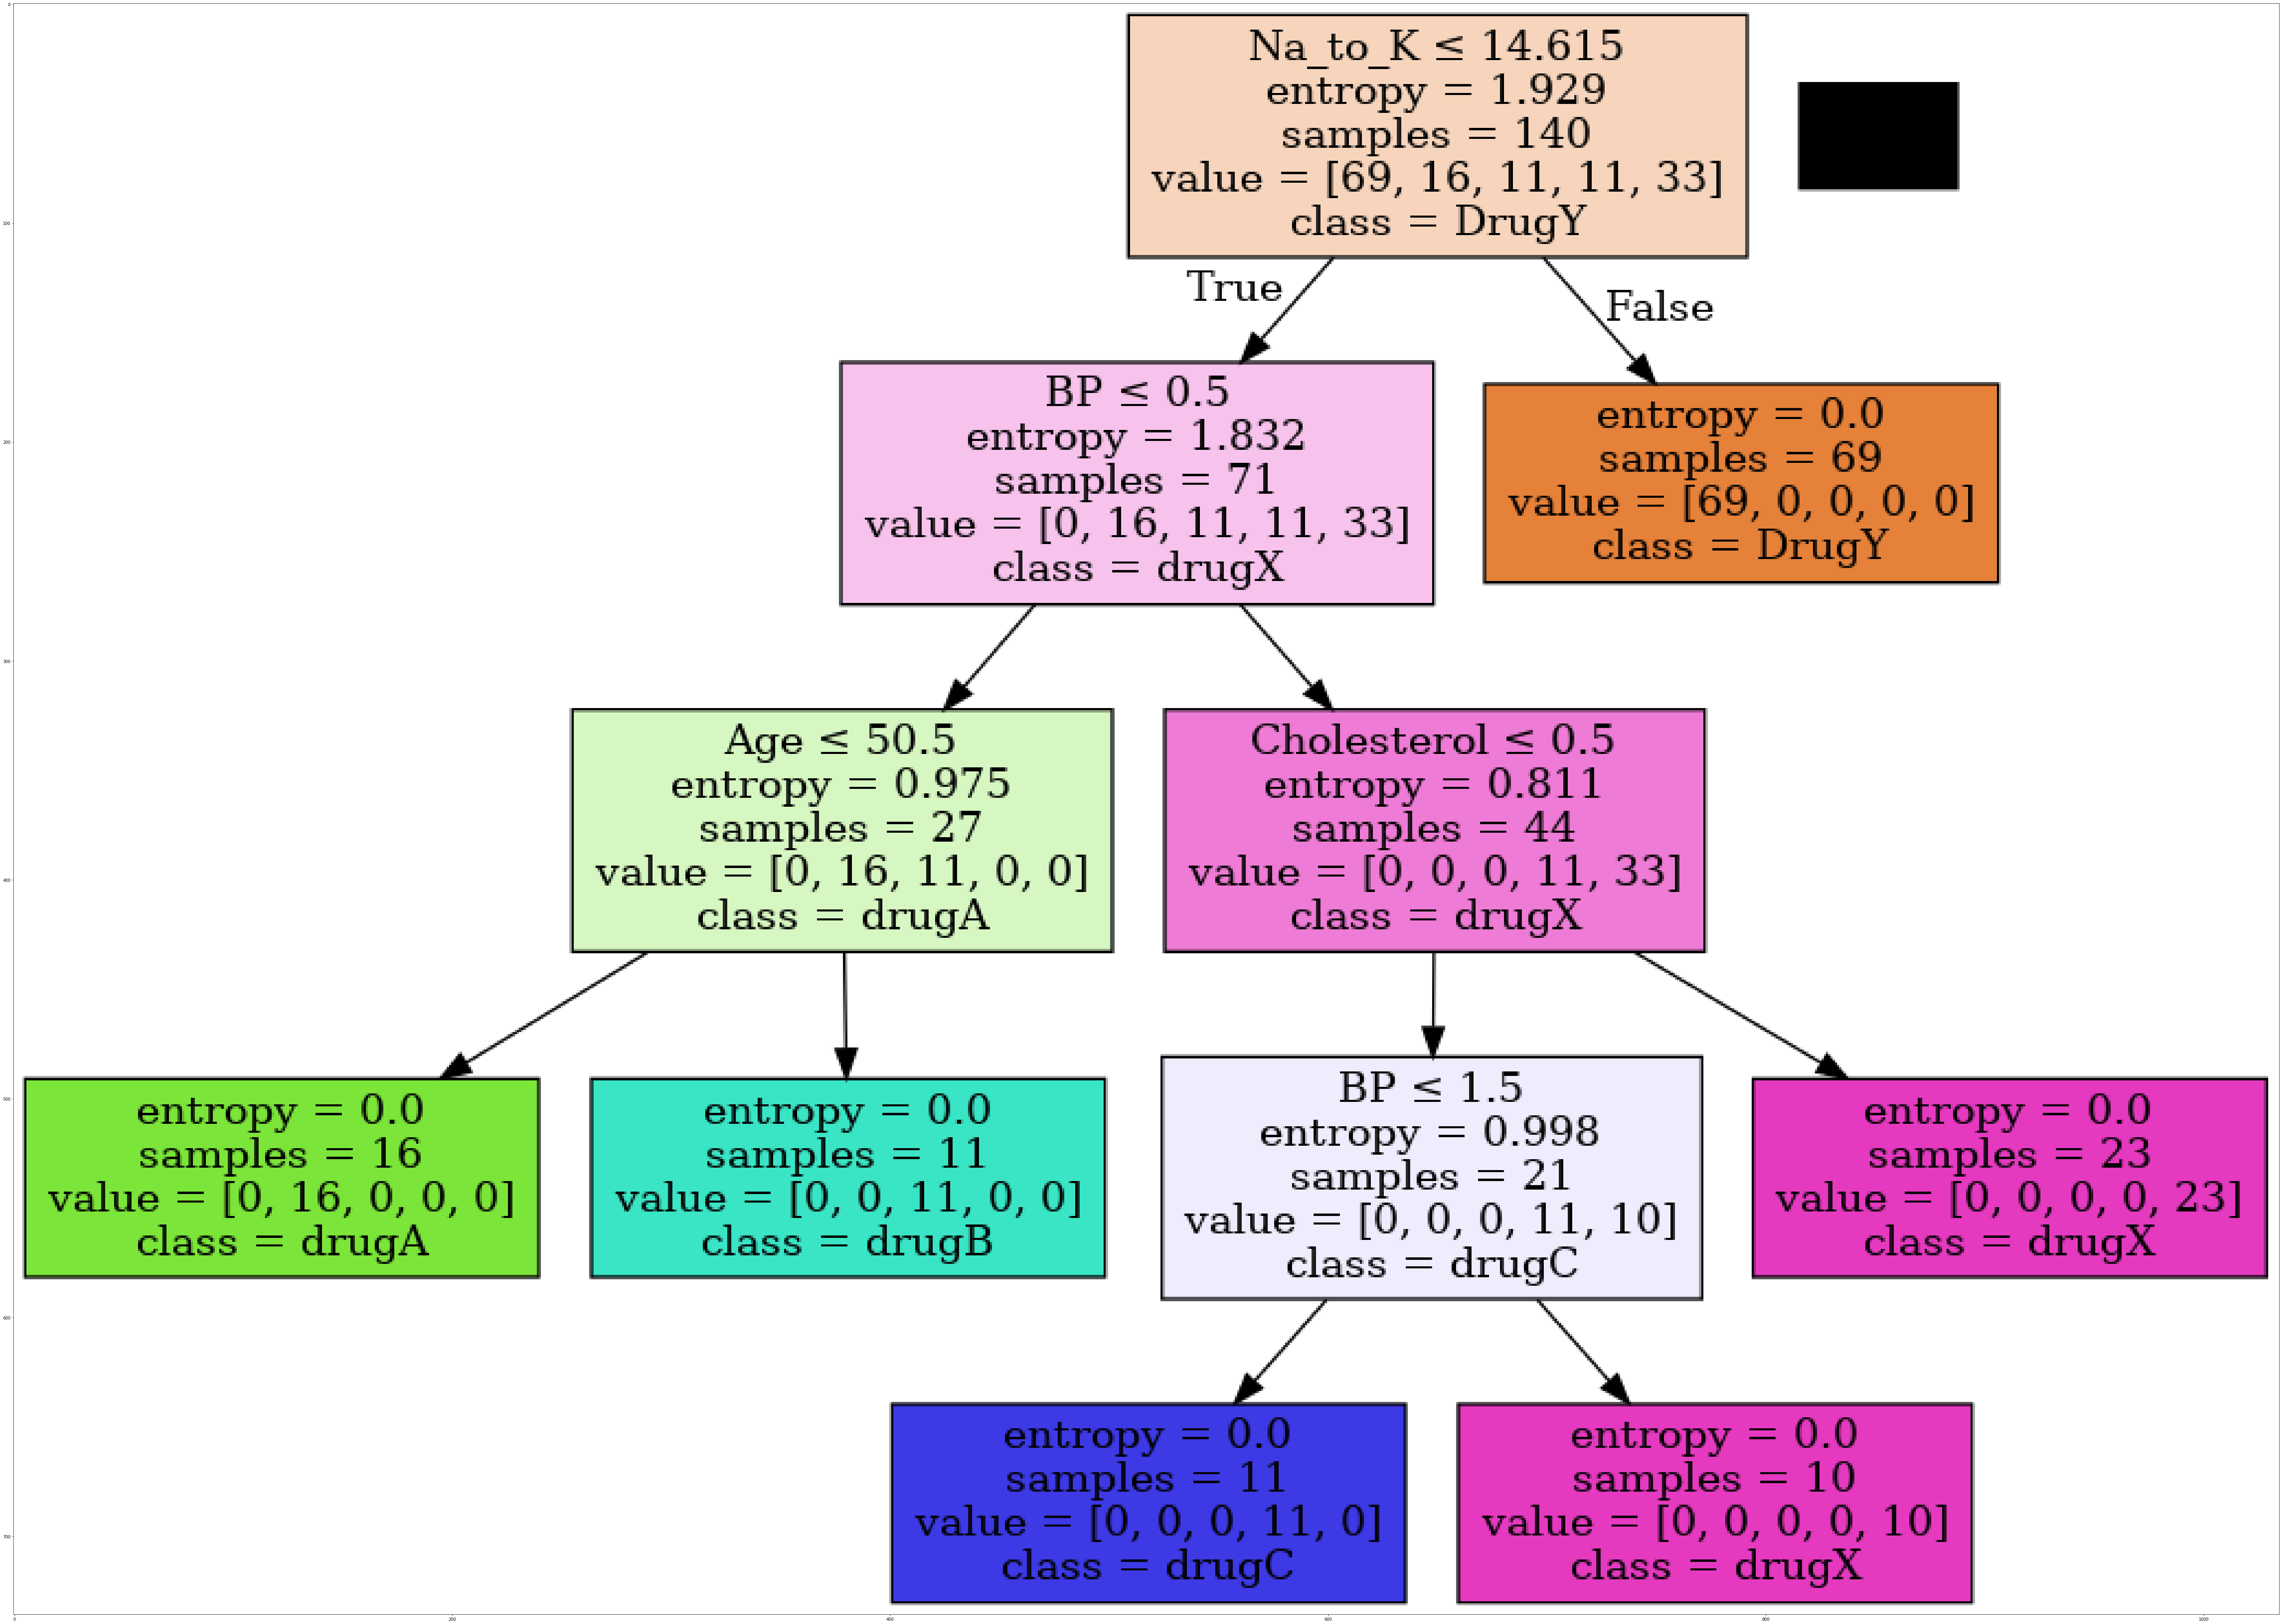

In [29]:
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())
graph.write_png(filename)
img = mpimg.imread(filename)
plt.figure(figsize = (100,200))
plt.imshow(img, interpolation = 'nearest')

Now, we finished creating our drug classification tree model!

Please upvote this notebook if you like it and I would love to read your comments about what to improve too <3